In [1]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose


 Load Data

In [2]:
# Define the tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Load the data
data = {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in tickers}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


 Save Datas

In [3]:
# Set your data folder path
data_folder = 'D:/Week11/data'  

# Ensure the folder exists
os.makedirs(data_folder, exist_ok=True)

# Save each DataFrame to a CSV file
for ticker in tickers:
    data[ticker].to_csv(os.path.join(data_folder, f'{ticker}_data.csv'), index=True)
    
 # Display the first few rows
    print(f"First 5 rows of {ticker} data:")
    print(data[ticker].head())  
    print() 
    
    # Display the shape (number of rows and columns)
    print(f"Total file size for {ticker}: {data[ticker].shape[0]} rows and {data[ticker].shape[1]} columns")
    print("-" * 40)  

print("Data has been saved successfully.")

First 5 rows of TSLA data:
Price                      Adj Close      Close       High        Low  \
Ticker                          TSLA       TSLA       TSLA       TSLA   
Date                                                                    
2015-01-02 00:00:00+00:00  14.620667  14.620667  14.883333  14.217333   
2015-01-05 00:00:00+00:00  14.006000  14.006000  14.433333  13.810667   
2015-01-06 00:00:00+00:00  14.085333  14.085333  14.280000  13.614000   
2015-01-07 00:00:00+00:00  14.063333  14.063333  14.318667  13.985333   
2015-01-08 00:00:00+00:00  14.041333  14.041333  14.253333  14.000667   

Price                           Open    Volume  
Ticker                          TSLA      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  14.858000  71466000  
2015-01-05 00:00:00+00:00  14.303333  80527500  
2015-01-06 00:00:00+00:00  14.004000  93928500  
2015-01-07 00:00:00+00:00  14.223333  44526000  
2015-01-08 00:00:00+00:00  14.187333  5163750

 Data Cleaning and Understanding

In [4]:
# Explore each dataset
for ticker, df in data.items():
    print(f"Data for {ticker}:")
    print(df.info())  
    print(df.describe())  
    
    # Handle missing values
    df.dropna(inplace=True)  

    # Ensure appropriate data types
    df['Date'] = df.index
    df['Adj Close'] = df['Adj Close'].astype(float)

Data for TSLA:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2474 entries, 2015-01-02 00:00:00+00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  2474 non-null   float64
 1   (Close, TSLA)      2474 non-null   float64
 2   (High, TSLA)       2474 non-null   float64
 3   (Low, TSLA)        2474 non-null   float64
 4   (Open, TSLA)       2474 non-null   float64
 5   (Volume, TSLA)     2474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 135.3 KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965   111.438965   113.895836   108.869421   111.461872   
std      110.120450   110.120450   112.643277   107.541830   110.208156   
min        9.57

 Exploratory Data Analysis (EDA)

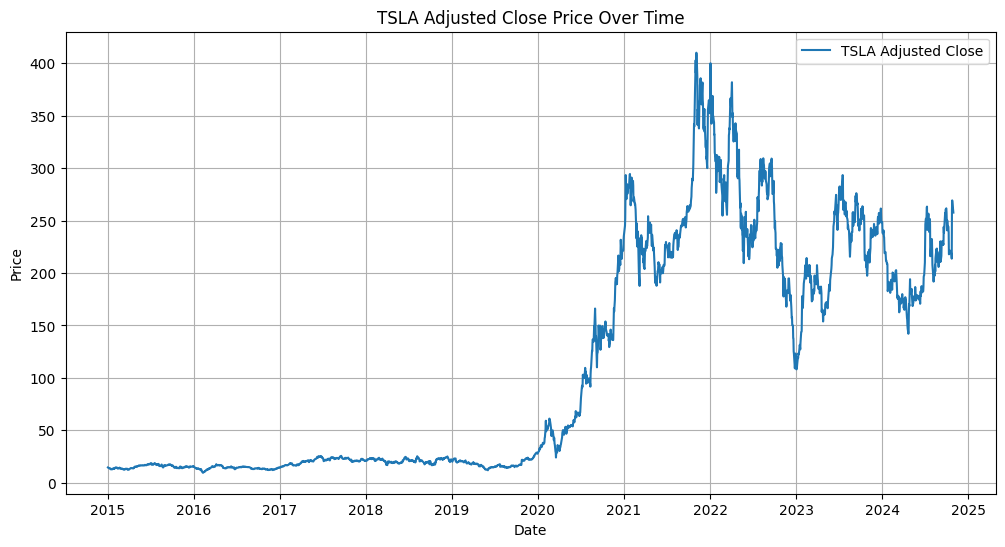

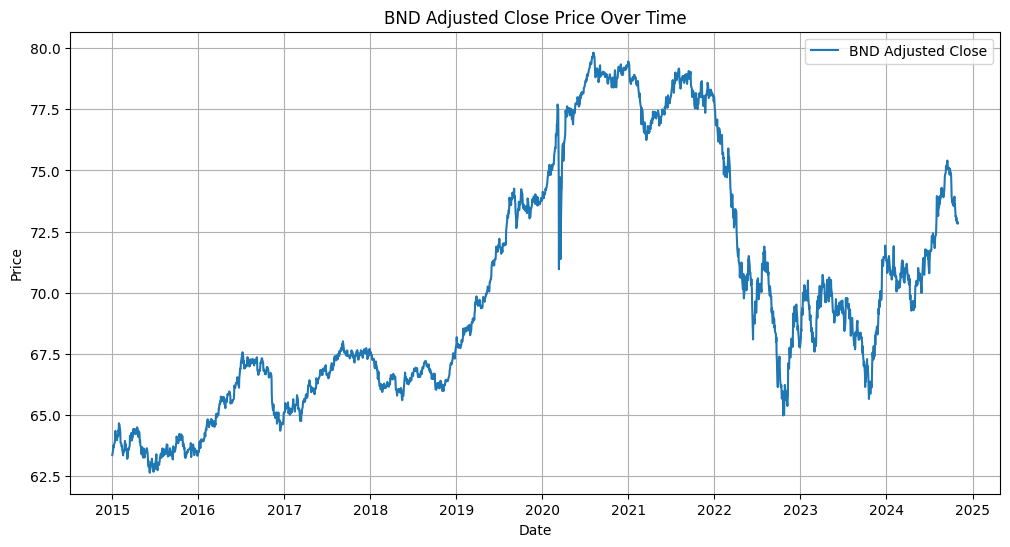

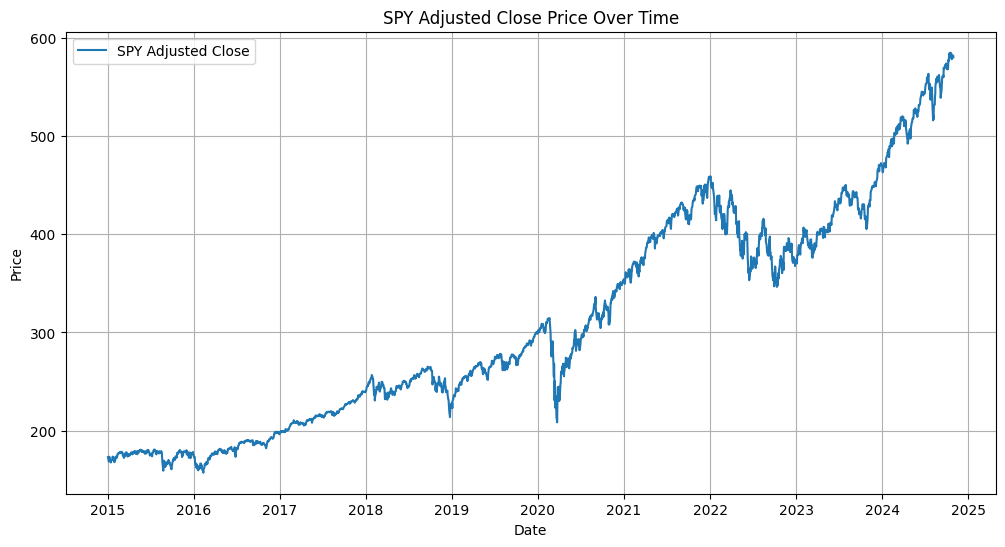

In [5]:

for ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(data[ticker]['Adj Close'], label=f'{ticker} Adjusted Close')
    plt.title(f'{ticker} Adjusted Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

 Calculate and Plot Daily Percentage Change

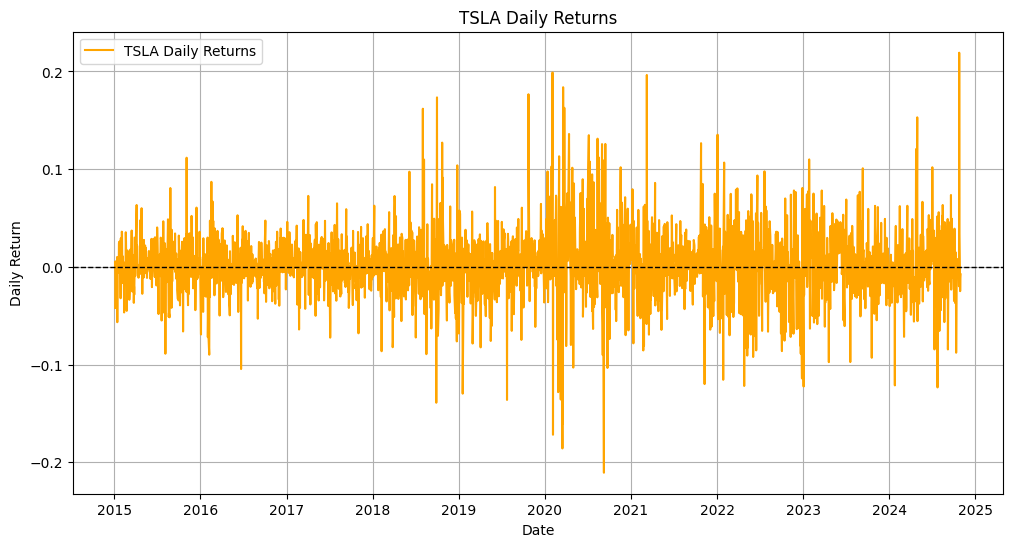

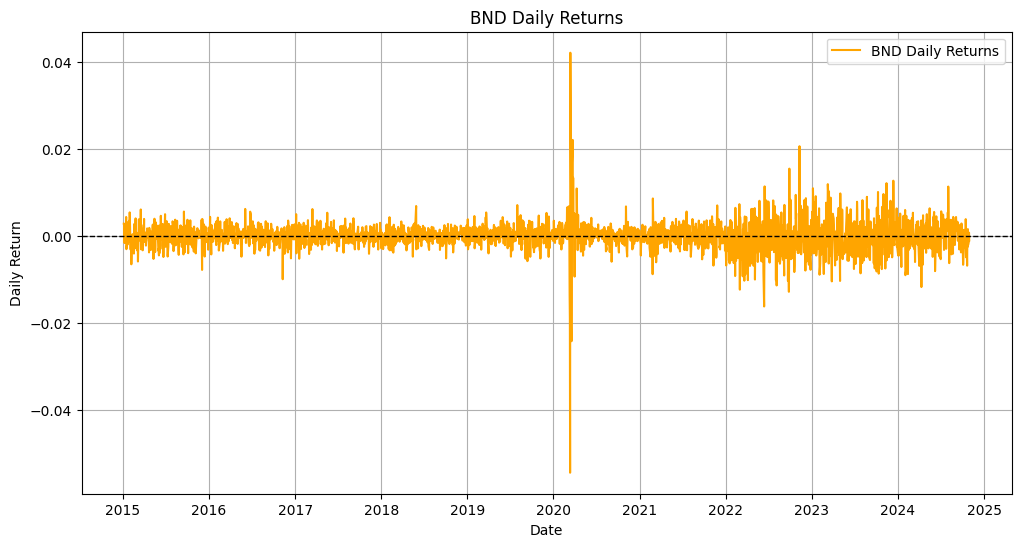

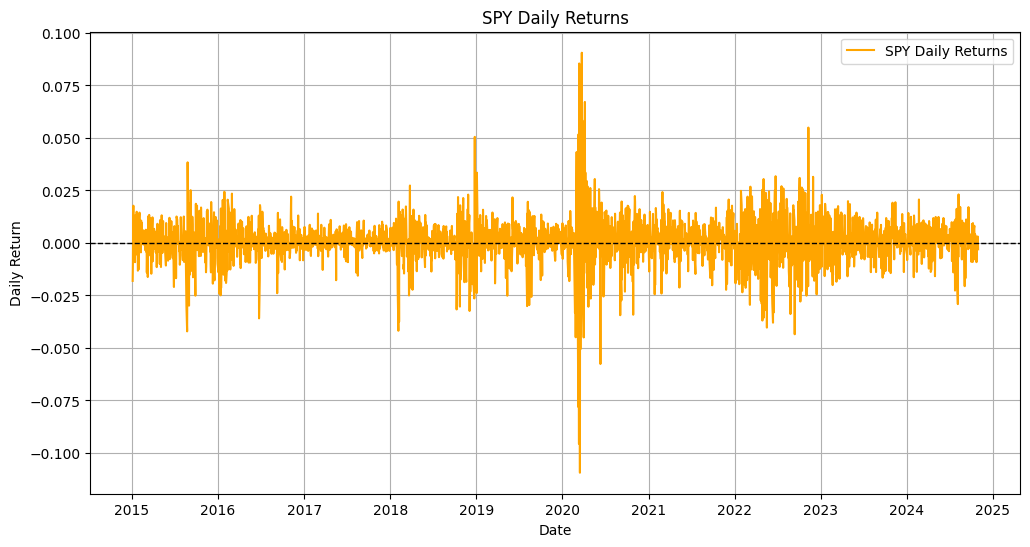

In [6]:
for ticker in tickers:
    data[ticker]['Daily Return'] = data[ticker]['Adj Close'].pct_change()
    plt.figure(figsize=(12, 6))
    plt.plot(data[ticker]['Daily Return'], label=f'{ticker} Daily Returns', color='orange')
    plt.title(f'{ticker} Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.axhline(0, color='black', lw=1, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

 Analyze Volatility

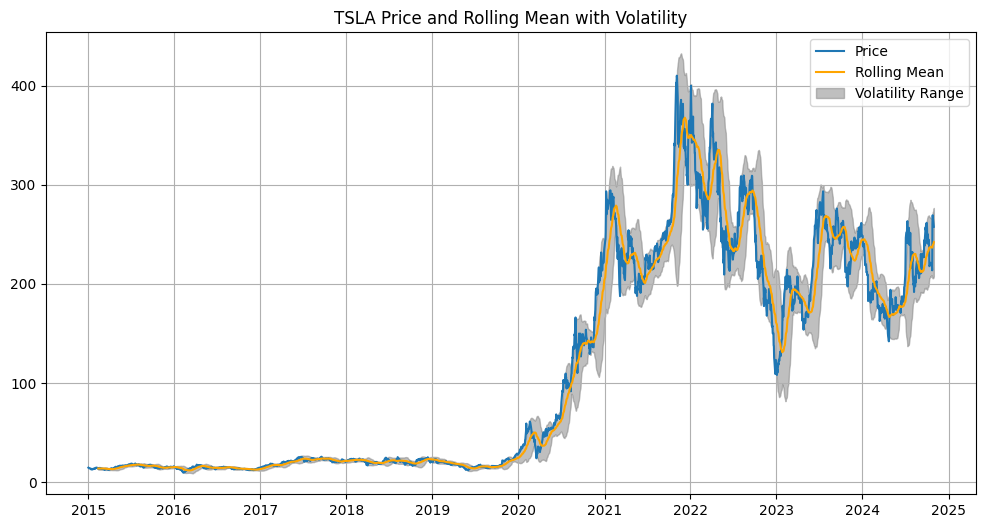

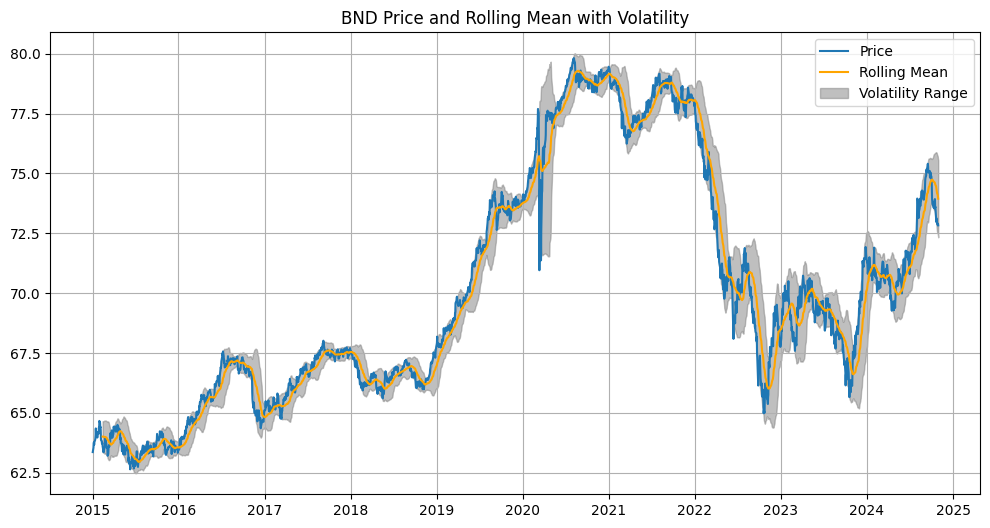

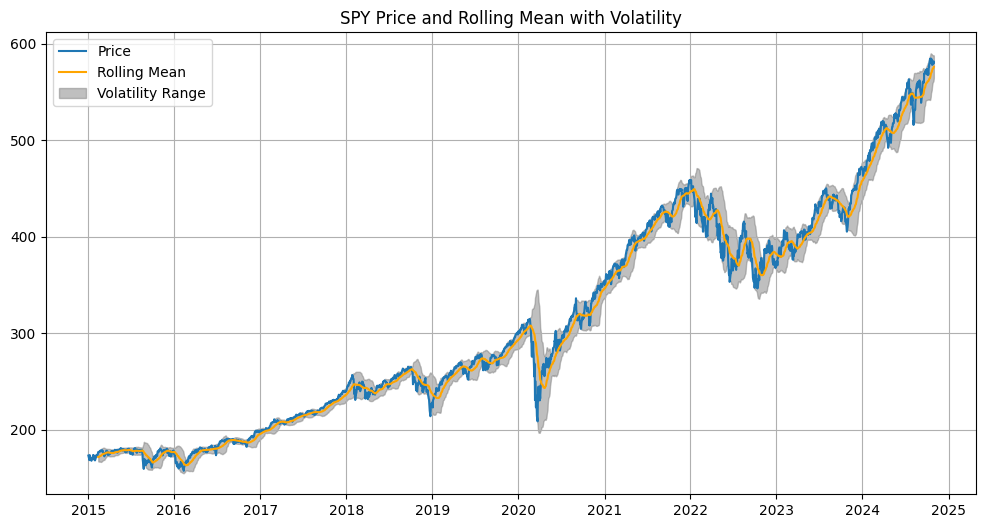

In [7]:
window_size = 30  
for ticker in tickers:
    data[ticker]['Rolling Mean'] = data[ticker]['Adj Close'].rolling(window=window_size).mean()
    data[ticker]['Rolling Std'] = data[ticker]['Adj Close'].rolling(window=window_size).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data[ticker]['Adj Close'], label='Price')
    plt.plot(data[ticker]['Rolling Mean'], label='Rolling Mean', color='orange')
    plt.fill_between(data[ticker].index, 
                     data[ticker]['Rolling Mean'] - 2 * data[ticker]['Rolling Std'], 
                     data[ticker]['Rolling Mean'] + 2 * data[ticker]['Rolling Std'], 
                     color='grey', alpha=0.5, label='Volatility Range')
    plt.title(f'{ticker} Price and Rolling Mean with Volatility')
    plt.legend()
    plt.grid()
    plt.show()

 Outlier Detection

In [8]:
# Outlier Detection
for ticker in tickers:
    # Calculate Z-scores
    daily_returns = data[ticker]['Daily Return'].dropna()
    z_scores = stats.zscore(daily_returns)
    
    # Create a mask for outliers
    outlier_mask = np.abs(z_scores) > 3
    
    # Get the indices of the outliers in the original DataFrame
    outlier_indices = daily_returns.index[outlier_mask]
    
    # Select the outliers from the original DataFrame using the indices
    outliers = data[ticker].loc[outlier_indices]
    
    print(f"Outliers for {ticker}:")
    print(outliers[['Daily Return']])

Outliers for TSLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-11-04 00:00:00+00:00     0.111735
2018-08-02 00:00:00+00:00     0.161880
2018-08-07 00:00:00+00:00     0.109886
2018-09-28 00:00:00+00:00    -0.139015
2018-10-01 00:00:00+00:00     0.173471
2018-10-23 00:00:00+00:00     0.127189
2019-01-18 00:00:00+00:00    -0.129711
2019-07-25 00:00:00+00:00    -0.136137
2019-10-24 00:00:00+00:00     0.176692
2020-02-03 00:00:00+00:00     0.198949
2020-02-04 00:00:00+00:00     0.137256
2020-02-05 00:00:00+00:00    -0.171758
2020-02-27 00:00:00+00:00    -0.128146
2020-03-02 00:00:00+00:00     0.113220
2020-03-09 00:00:00+00:00    -0.135725
2020-03-12 00:00:00+00:00    -0.116172
2020-03-16 00:00:00+00:00    -0.185778
2020-03-18 00:00:00+00:00    -0.160344
2020-03-19 00:00:00+00:00     0.183877
2020-03-24 00:00:00+00:00     0.162817
2020-04-13 00:00:00+00:00     0.136038
2020-07-06 00:00:00+00:00     0.134794
2020-0

 Seasonality and Trends

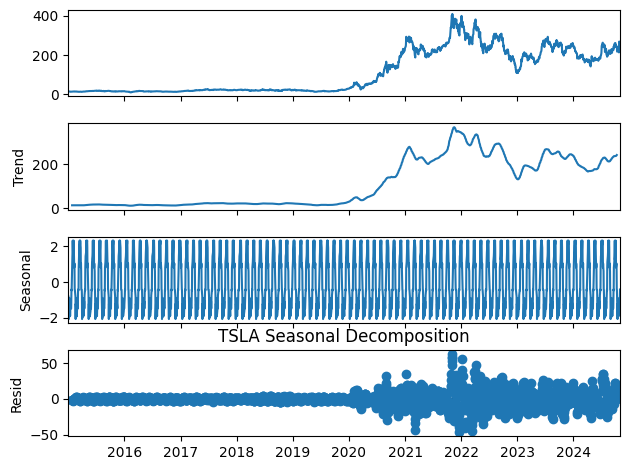

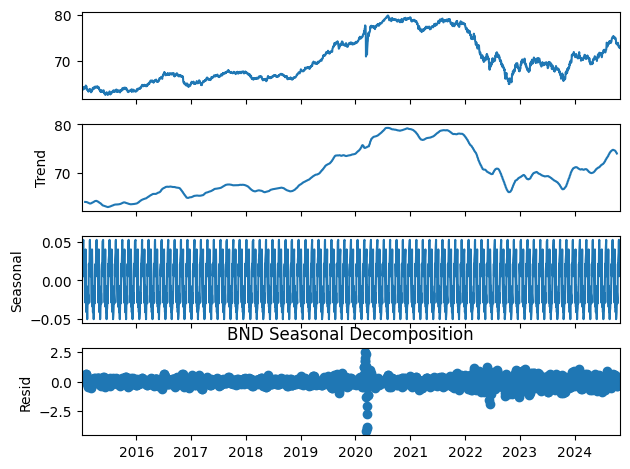

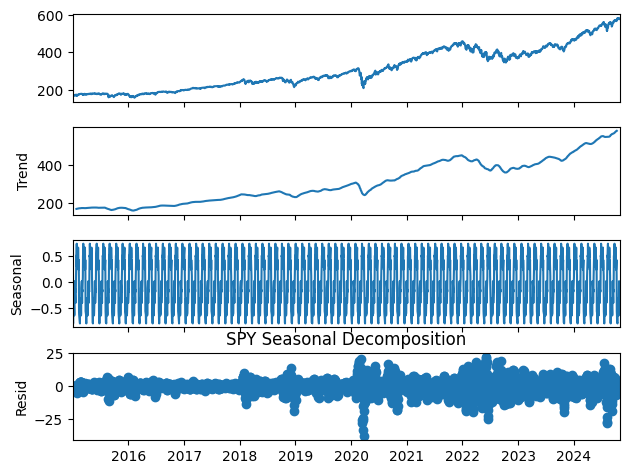

In [9]:

for ticker in tickers:
    decomposition = seasonal_decompose(data[ticker]['Adj Close'], model='additive', period=30)
    fig = decomposition.plot()
    plt.title(f'{ticker} Seasonal Decomposition')
    plt.show()

 Analyze Volatility

In [10]:

for ticker in tickers:
    daily_returns = data[ticker]['Daily Return'].dropna()
    mean_return = daily_returns.mean()
    std_dev = daily_returns.std()
    
    # Value at Risk (VaR)
    VaR_95 = np.percentile(daily_returns, 5)  
    print(f"{ticker} VaR (95%): {VaR_95}")

    # Sharpe Ratio
    sharpe_ratio = (mean_return / std_dev) * np.sqrt(252)  
    print(f"{ticker} Sharpe Ratio: {sharpe_ratio}")

TSLA VaR (95%): -0.05125703646165556
TSLA Sharpe Ratio: 0.7976895871027542
BND VaR (95%): -0.004797554202802923
BND Sharpe Ratio: 0.28810702282242484
SPY VaR (95%): -0.016763881342300647
SPY Sharpe Ratio: 0.7858088277875792
